In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [61]:
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-Learn:", sklearn.__version__)

NumPy: 2.1.3
Pandas: 2.2.3
Scikit-Learn: 1.6.1


In [62]:
import numpy as np
import scipy
import numba
import xgboost as xgb
print(np.__version__) 
print(scipy.__version__)
print(numba.__version__)
print(xgb.__version__)


2.1.3
1.15.1
0.61.0
2.1.1


In [63]:
df=pd.read_csv('C:/Users/Usuario/Desktop/Analisis_Robinson/global_energy_consumption.csv')

In [64]:
df.head(3)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26


In [65]:
pais = "Germany"  # Cambia esto por el país que quieras revisar
df_pais = df_2020[df_2020["Country"] == pais]
print(df_pais)


      Country  Year  Total Energy Consumption (TWh)  \
1     Germany  2020                         7922.08   
230   Germany  2020                         7365.25   
740   Germany  2020                         4712.13   
806   Germany  2020                          568.76   
838   Germany  2020                         2101.93   
958   Germany  2020                         7597.33   
974   Germany  2020                         5299.24   
985   Germany  2020                         8354.71   
1225  Germany  2020                         2959.63   
1249  Germany  2020                         5571.08   
1348  Germany  2020                         5931.70   
1374  Germany  2020                         5111.89   
1644  Germany  2020                         9747.87   
1720  Germany  2020                         5611.29   
1973  Germany  2020                         9283.38   
2285  Germany  2020                         9768.21   
2409  Germany  2020                         5686.98   
2517  Germ

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


      Country  Year  Total Energy Consumption (TWh)
1     Germany  2020                         7922.08
8      Russia  2020                         9624.55
25        USA  2020                         8381.55
73     Brazil  2020                         8600.63
97     Canada  2020                         1231.80
...       ...   ...                             ...
9789    Japan  2020                         1150.52
9899    India  2020                         1158.67
9936   Canada  2020                         5556.76
9949    China  2020                         4181.50
9998       UK  2020                         5950.39

[430 rows x 3 columns]


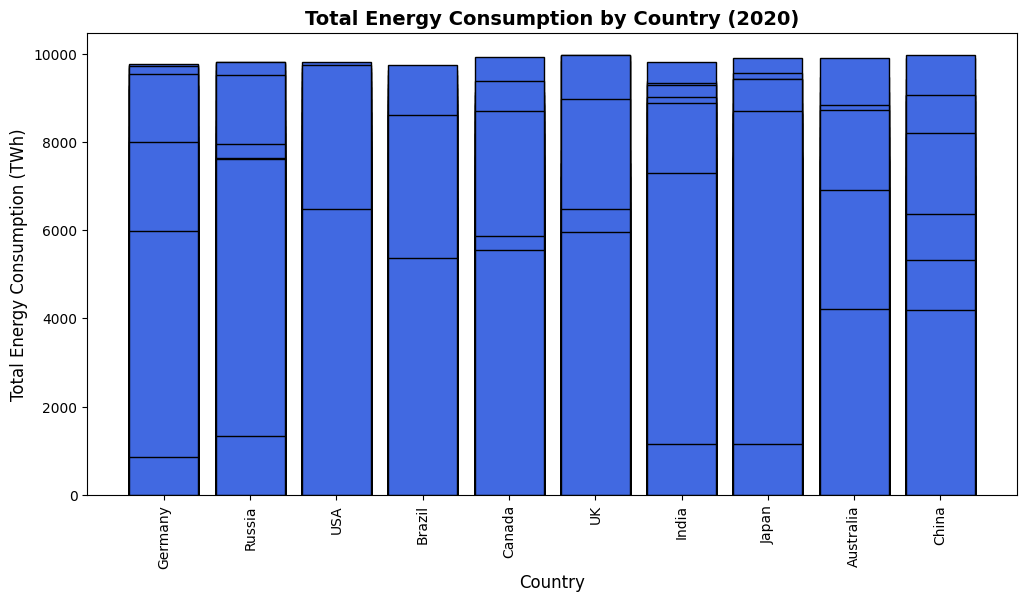

In [58]:
# Filtrar solo los datos del año 2020
df_2020 = df[df["Year"] == 2020]

# Verificar que el filtrado es correcto
print(df_2020[["Country", "Year", "Total Energy Consumption (TWh)"]])

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(df_2020["Country"], df_2020["Total Energy Consumption (TWh)"], 
        color="royalblue", edgecolor="black")

# Etiquetas y título
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Energy Consumption (TWh)", fontsize=12)
plt.title("Total Energy Consumption by Country (2020)", fontsize=14, fontweight="bold")

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()


In [66]:
print(df_2020.groupby("Country")["Total Energy Consumption (TWh)"].sum())


Country
Australia    188146.90
Brazil       268126.81
Canada       245122.52
China        189540.21
Germany      270388.36
India        238187.52
Japan        196250.97
Russia       228971.16
UK           179216.49
USA          254635.67
Name: Total Energy Consumption (TWh), dtype: float64


In [68]:
df_2020 = df_2020.groupby("Country", as_index=False)["Total Energy Consumption (TWh)"].sum()


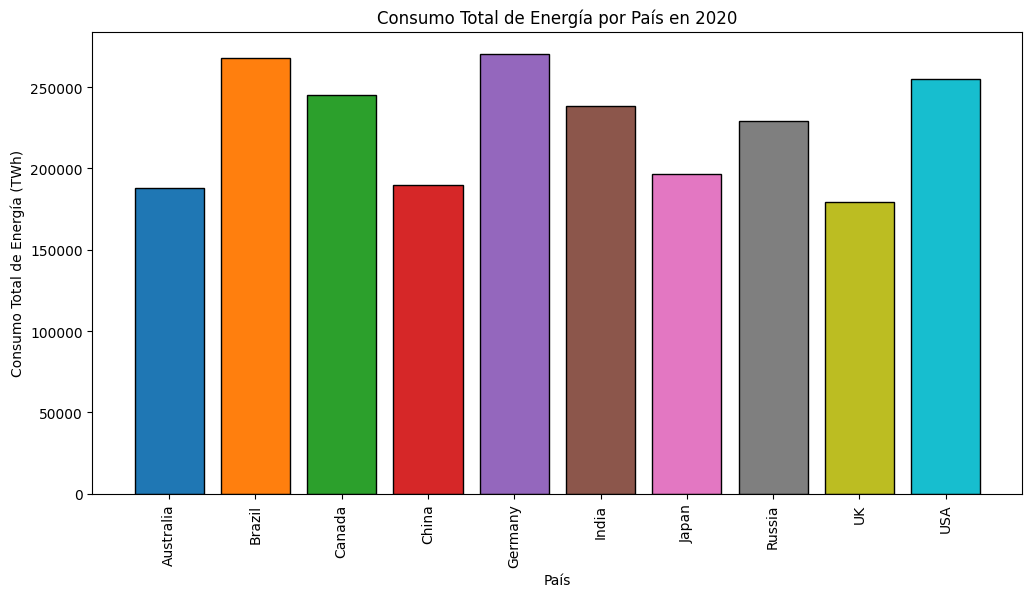

In [72]:
# Agrupar por país sumando el consumo total de energía
df_2020 = df_2020.groupby("Country", as_index=False)["Total Energy Consumption (TWh)"].sum()

# Generar una lista de colores únicos para cada país
colormap = plt.colormaps["tab10"]
num_paises = len(df_2020)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(df_2020["Country"], df_2020["Total Energy Consumption (TWh)"], 
        color=[colormap(i % 10) for i in range(num_paises)], edgecolor='black')

# Personalizar la gráfica
plt.xlabel("País")
plt.ylabel("Consumo Total de Energía (TWh)")
plt.title("Consumo Total de Energía por País en 2020")
plt.xticks(rotation=90)  # Rotar nombres de los países para mejor visualización

# Mostrar la gráfica
plt.show()


In [74]:
# Calcular el consumo promedio de energía para cada país
df_avg_consumption = df.groupby("Country", as_index=False)["Total Energy Consumption (TWh)"].mean()

# Ordenar de mayor a menor
df_avg_consumption = df_avg_consumption.sort_values(by="Total Energy Consumption (TWh)", ascending=False)

# Mostrar los resultados
print(df_avg_consumption)


     Country  Total Energy Consumption (TWh)
9        USA                     5323.466676
6      Japan                     5279.490111
5      India                     5266.872149
8         UK                     5262.176180
4    Germany                     5184.558661
2     Canada                     5086.422684
7     Russia                     5058.404550
0  Australia                     5046.237081
3      China                     5036.665137
1     Brazil                     4858.032318
